<a href="https://colab.research.google.com/github/askolesov0608/CV_NV/blob/main/99CVLab1_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and setup

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

In [4]:
!cp /content/gdrive/MyDrive/CV/Lab1/visualPercepUtils.py /content #copy file

In [5]:
!cp -r /content/gdrive/MyDrive/CV/Lab1/ /content #copy all folder

In [6]:
from PIL import Image
import numpy as np
import glob # Модуль для поиска файлов в директориях с помощью шаблонов в Unix стиле. Например, glob.glob('*.png')
import os
import visualPercepUtils as vpu

In [7]:
#files.upload()

# Code provided from the teacher

In [8]:
def histeq(im, nbins=256):
    #im: исходное изображение в формате массива NumPy.
    #nbins: количество бинов для гистограммы, по умолчанию 256 (что типично для 8-битных градаций серого).

    #Вычисляется гистограмма этого массива с использованием функции np.histogram,
    #где density=False указывает на то, что гистограмма должна быть выражена через абсолютные частоты.
    imhist, bins = np.histogram(im.flatten(), list(range(nbins)), density=False)

    #Используется метод cumsum() для расчета кумулятивной суммы гистограммы,
    #которая представляет собой кумулятивную функцию распределения (CDF).
    cdf = imhist.cumsum() # cumulative distribution function (CDF) = cummulative histogram

    #Вычисляется нормализационный коэффициент factor как отношение 255
    #(максимально возможное значение для 8-битного изображения) к последнему элементу CDF.
    factor = 255 / cdf[-1]  # cdf[-1] = last element of the cummulative sum = total number of pixels)

    #С помощью функции np.interp производится интерполяция каждого пикселя оригинального изображения с учетом новых значений,
    #определенных через CDF и factor.
    im2 = np.interp(im.flatten(), bins[:-1], factor*cdf)

    #Результат интерполяции приводится к исходной форме изображения с помощью метода reshape.
    return im2.reshape(im.shape), cdf #Возвращаемые значения Измененное изображение с улучшенным контрастом.
                                      #CDF исходной гистограммы изображения.


In [9]:
#Эта функция предназначена для тестирования функции histeq на практике.
def testHistEq(im):
    #im: исходное изображение в формате массива NumPy
    im2, cdf = histeq(im) #Вызывает функцию histeq для входного изображения im.
    return [im2, cdf]  #Возвращает результат работы histeq, включая измененное изображение и CDF.


In [10]:
#Функция для затемнения изображения путем модификации его пикселей.
def darkenImg(im,p=2):
    #im: исходное изображение.
    #p: параметр затемнения, по умолчанию равен 2.

    #Изображение возводится в степень p, что увеличивает разницу между темными и светлыми участками.
    #Результат нормализуется делением на 255 ** (p - 1) для поддержания диапазона значений в пределах [0, 255].
    return (im ** float(p)) / (255 ** (p - 1)) # try without the float conversion and see what happens


In [11]:
#Функция для осветления изображения.
def brightenImg(im,p=2):
    #im: исходное изображение.
    #p: параметр осветления, по умолчанию равен 2.

    # значения пикселей нормализуются и затем возводятся в степень 1.0 / p.
    #Используется np.power для применения степени, что позволяет более гибко управлять осветлением.
    return np.power(255.0 ** (p - 1) * im, 1. / p)  # notice this NumPy function is different to the scalar math.pow(a,b)


In [12]:
# принимает изображение im, применяет функцию darkenImg с параметром p=2
# для затемнения изображения и возвращает список с затемненным изображением.
def testDarkenImg(im):
    im2 = darkenImg(im,p=2) #  Is "p=2" different here than in the function definition? Can we remove "p=" here?
                            #darkenImg(im, 2) = darkenImg(im, p=2).
    return [im2]

In [13]:
#testBrightenImg(im): принимает изображение im, применяет функцию brightenImg с локально определенным параметром
#p=2 для осветления  изображения и возвращает список с осветленным изображением.
def testBrightenImg(im):
    p=2
    im2=brightenImg(im,p)
    return [im2]

In [14]:
#NEW 1 Ex
def saveImg(image_array, output_path):
    pil_image = Image.fromarray(image_array.astype(np.uint8))  # Преобразование массива NumPy в объект изображения PIL
    pil_image.save(output_path)  # Сохранение изображения
    #image_array: Массив NumPy изображения, который нужно сохранить.
    #output_path: Полный путь к файлу, куда изображение будет сохранено.

    #Использование функции saveImg()
    saveImg(im2, os.path.join(path_output, fname + suffixFiles[test] + fext))

In [15]:
#пути к директориям для входных и выходных файлов.
path_input = './imgs-P1/'
path_output = './imgs-out-P1/'

In [16]:
bAllFiles = True #флаг, определяющий, будут ли обработаны все файлы формата .pgm в директории path_input или только файл iglesia.pgm.

if bAllFiles:
    files = glob.glob(path_input + "*.pgm")  #все файлы формата .pgm
else:
    files = [path_input + 'iglesia.pgm'] # iglesia,huesos или только файл iglesia.pgm


#флаг, который определяет, какие тесты будут выполнены (все три теста или только гистограммное выравнивание).
bAllTests = True
if bAllTests:
    tests = ['testHistEq', 'testBrightenImg', 'testDarkenImg'] #tests: список функций для тестирования.
else:
    tests = ['testHistEq']#['testBrightenImg'] tests: список функций для тестирования.

nameTests = {'testHistEq': "Histogram equalization", #словари, сопоставляющие названия функций
             'testBrightenImg': 'Brighten image',
             'testDarkenImg': 'Darken image'}

suffixFiles = {'testHistEq': '_heq',  # словари, сопоставляющие названия функций
               'testBrightenImg': '_br',
               'testDarkenImg': '_dk'}

bSaveResultImgs = True

In [17]:
def doTests(): # Вывод информации о тестировании
    print("Testing on", files)

    for imfile in files: #Цикл for перебирает все файлы в списке files.

        #Для каждого файла изображение открывается с помощью Image.open(imfile), после чего преобразуется
        #в градации серого (convert('L')),
        #и затем конвертируется в массив NumPy (np.array).
        im = np.array(Image.open(imfile).convert('L'))  # from Image to array

        for test in tests: #Вложенный цикл for перебирает все тесты из списка tests.

            out = eval(test)(im) # что позволяет вызвать функцию тестирования по её имени (хранящемуся в виде строки).
                                 # Входным аргументом функции тестирования является изображение im.
                                 # Результат теста (обычно список) сохраняется в переменной out.

            # Визуализация и анализ результатов
            im2 = out[0] # извлекает первый элемент из списка результатов, который обычно является обработанным изображением.

            vpu.showImgsPlusHists(im, im2, title=nameTests[test]) # вызывает функцию из модуля visualPercepUtils для отображения исходного
                                                                  # и обработанного изображений с их гистограммами.

            if len(out) > 1:   #Дополнительная проверка if len(out) > 1 позволяет обработать случаи,
                                #когда тест возвращает дополнительные данные (например, CDF для гистограммного выравнивания).
                                #Эти данные отображаются с помощью vpu.showPlusInfo.

                vpu.showPlusInfo(out[1],"cumulative histogram" if test=="testHistEq" else None)

            if bSaveResultImgs: #Если флаг bSaveResultImgs установлен в True, происходит сохранение обработанного изображения:

                dirname,basename = os.path.dirname(imfile), os.path.basename(imfile) #Извлекаются имя директории и базовое имя файла.
                                                            #Имя файла разбивается на имя и расширение.

                fname, fext = os.path.splitext(basename)
                #print(dname,basename)
                pil_im = Image.fromarray(im2.astype(np.uint8))  # from array to Image
                                                            #Создается объект изображения PIL из массива NumPy с использованием
                                                            #Image.fromarray(im2.astype(np.uint8)).


                pil_im.save(path_output+'//'+fname + suffixFiles[test] + fext)

if __name__== "__main__":
    doTests()

Testing on []


# Testing directory and loads

In [18]:
ls

gdrive/  Lab1/  __pycache__/  sample_data/  visualPercepUtils.py


In [19]:
folder_path = './Lab1/imgs-P1/'
path_output = './Lab1/imgs-out-P1/'

In [20]:
contents = os.listdir(folder_path)
for item in contents:
    print(item)

peppers.ppm
couple.ppm
iglesia.pgm
huesos.pgm
girl.ppm
cabeza.pgm
jelly_beans.ppm
tree.ppm
toys.ppm


In [21]:
filename = "girl.ppm"

In [22]:
path_input = os.path.join(folder_path, filename)

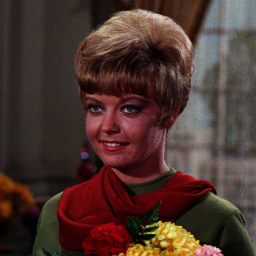

In [23]:
pil_image = Image.open(path_input)
pil_image

array([[ 47,  42,  43, ..., 133, 134, 131],
       [ 48,  45,  44, ..., 136, 133, 136],
       [ 43,  44,  46, ..., 133, 128, 129],
       ...,
       [  5,   3,   3, ...,  61,  90, 102],
       [  9,  11,  11, ...,  62,  85, 102],
       [ 18,  17,  16, ...,  54,  73,  96]], dtype=uint8)
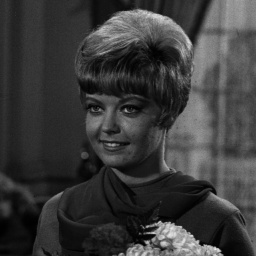

In [24]:
im = np.array(pil_image.convert('L'))
im

# Ex Question 2 Save IMG

In [25]:
def saveImage(input_file, folder_path=None, path_output=None):
    if folder_path is None:
        folder_path = './Lab1/imgs-P1/'
    if path_output is None:
        path_output = './Lab1/imgs-out-P1/'

        # Полный путь к входному файлу
    full_input_path = os.path.join(folder_path, input_file)
    print("full path input", full_input_path)

        # Открытие изображения
    pil_image = Image.open(full_input_path)

        # Преобразование изображения в черно-белое
    im = np.array(pil_image.convert('L'))

        # Создание черно-белого изображения из массива
    im_pil = Image.fromarray(im)

       # Подготовка имени файла для сохранения
    base_name = os.path.splitext(input_file)[0]  # Базовое имя файла без расширения
    print("input", base_name)
    output_file = base_name + 'tested' + '.png'  # Добавление 'tested' к имени файла
    print("output", output_file)

    # Полный путь к выходному файлу
    full_output_path = os.path.join(path_output, output_file)
    print("fulд path output", full_output_path)

    # Создание директории, если она не существует
    os.makedirs(path_output, exist_ok=True)

    # Сохранение изображения
    im_pil.save(full_output_path)
    print(f'Файл сохранен как {full_output_path}')

In [26]:
ls

gdrive/  Lab1/  __pycache__/  sample_data/  visualPercepUtils.py


In [27]:
saveImage(filename)

full path input ./Lab1/imgs-P1/girl.ppm
input girl
output girltested.png
fulд path output ./Lab1/imgs-out-P1/girltested.png
Файл сохранен как ./Lab1/imgs-out-P1/girltested.png


# Ex Question 3 brightening and dark function

## Different plot

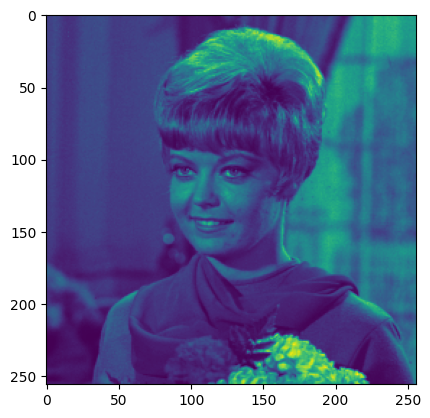

In [28]:
import matplotlib.pyplot as plt
image_path = './Lab1/imgs-out-P1/girltested.png'
img = Image.open(image_path)
plt.imshow(img)
plt.show()

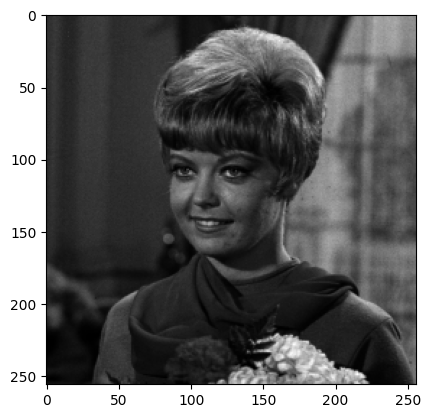

In [29]:
#или
plt.imshow(Image.open('./Lab1/imgs-out-P1/girltested.png').convert('L'), cmap='gray')
#(convert('L')) и указывает matplotlib использовать цветовую карту gray

## RGB Liter - Darker

In [30]:
"""
Так тоже можно
imt = np.asarray(pil_image, dtype="int32")
#np.asarray( img, dtype="int32" )
print(type(imt))
print(imt)
"""

'\nТак тоже можно\nimt = np.asarray(pil_image, dtype="int32")\n#np.asarray( img, dtype="int32" )\nprint(type(imt))\nprint(imt)\n'

<class 'numpy.ndarray'>
[[[ 52  46  42]
  [ 47  40  38]
  [ 50  42  34]
  ...
  [137 131 136]
  [126 137 136]
  [126 134 130]]

 [[ 55  45  43]
  [ 50  44  35]
  [ 54  40  38]
  ...
  [129 139 143]
  [129 134 139]
  [121 142 146]]

 [[ 46  42  39]
  [ 49  42  43]
  [ 52  42  55]
  ...
  [126 137 133]
  [123 131 130]
  [118 134 128]]

 ...

 [[  4   5   5]
  [  3   3   4]
  [  3   3   3]
  ...
  [ 60  64  44]
  [ 84  93  91]
  [ 98 105  93]]

 [[ 11   8  10]
  [ 12  11  12]
  [ 12  10  10]
  ...
  [ 60  68  40]
  [ 86  88  64]
  [100 105  91]]

 [[ 20  18  16]
  [ 19  16  16]
  [ 20  14  13]
  ...
  [ 55  56  42]
  [ 70  78  58]
  [ 93 100  80]]]


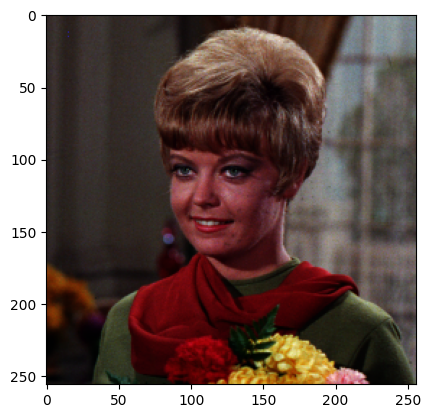

In [31]:
imt = np.array(pil_image, dtype="int32")
# can be this imt = np.array(pil_image)
#np.asarray( img, dtype="int32" )
print(type(imt))
print(imt)
plt.imshow(imt)

array([[[171, 166, 162],
        [167, 160, 158],
        [169, 162, 154],
        ...,
        [218, 215, 217],
        [213, 218, 217],
        [213, 217, 215]],

       [[173, 165, 163],
        [169, 164, 155],
        [172, 160, 158],
        ...,
        [215, 219, 220],
        [215, 217, 219],
        [211, 220, 221]],

       [[166, 162, 159],
        [168, 162, 163],
        [171, 162, 173],
        ...,
        [213, 218, 216],
        [212, 215, 215],
        [210, 217, 214]],

       ...,

       [[ 90,  95,  95],
        [ 83,  83,  90],
        [ 83,  83,  83],
        ...,
        [177, 180, 164],
        [193, 198, 197],
        [200, 204, 198]],

       [[116, 107, 113],
        [118, 116, 118],
        [118, 113, 113],
        ...,
        [177, 183, 160],
        [194, 195, 180],
        [201, 204, 197]],

       [[134, 131, 127],
        [133, 127, 127],
        [134, 123, 121],
        ...,
        [173, 174, 162],
        [184, 189, 176],
        [198, 201, 190]]], dtype=uint8)
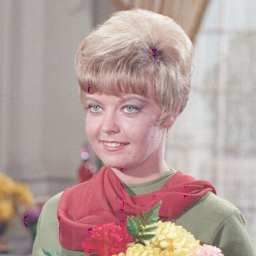

In [32]:
p = 4
#Так
brtimg = np.power(255.0 ** (p - 1) * imt, 1. / p).astype(np.uint8)
#Или так
#brtimg = np.short(brtimg) # главное поменять размер массива
brtimg

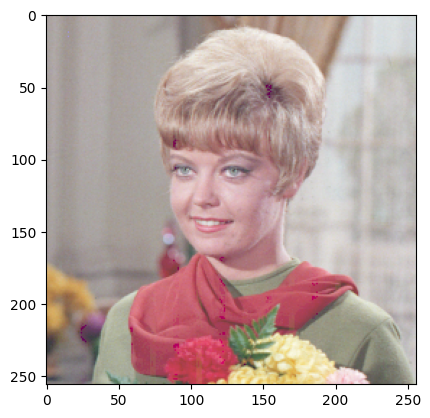

In [33]:
plt.imshow(brtimg)

In [34]:
k = 2
darkimg = (imt ** float(k)) / (255 ** (k - 1))
darkimg = np.short(darkimg)
darkimg

array([[[10,  8,  6],
        [ 8,  6,  5],
        [ 9,  6,  4],
        ...,
        [73, 67, 72],
        [62, 73, 72],
        [62, 70, 66]],

       [[11,  7,  7],
        [ 9,  7,  4],
        [11,  6,  5],
        ...,
        [65, 75, 80],
        [65, 70, 75],
        [57, 79, 83]],

       [[ 8,  6,  5],
        [ 9,  6,  7],
        [10,  6, 11],
        ...,
        [62, 73, 69],
        [59, 67, 66],
        [54, 70, 64]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [14, 16,  7],
        [27, 33, 32],
        [37, 43, 33]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [14, 18,  6],
        [29, 30, 16],
        [39, 43, 32]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  0,  0],
        ...,
        [11, 12,  6],
        [19, 23, 13],
        [33, 39, 25]]], dtype=int16)

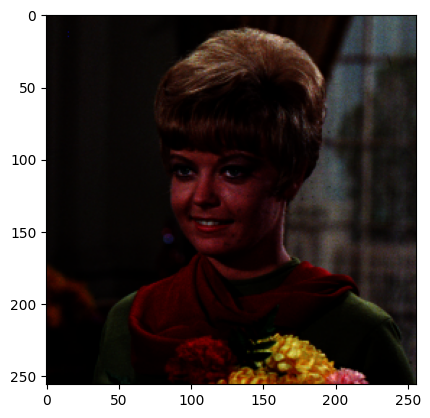

In [35]:
plt.imshow(darkimg)

#Ex Question 4 Write a function checkBoardImg

## Function checkBoardImg

In [36]:
def checkBoardImg(im, i, j):
    # Convert PIL Image to a NumPy array
    image_array = np.array(im.convert('L'))
    rows, cols = image_array.shape

    # Calculate the size of each cell
    cell_height = rows // i # // return the integer part of the division result.
    cell_width = cols // j

    # Create a new image array for the output
    output_array = np.zeros_like(image_array)

    # Apply the transformation on each cell
    for row in range(i):
        for col in range(j):
            # Determine the boundaries of the cell
            row_start = row * cell_height
            row_end = (row + 1) * cell_height if (row + 1) * cell_height <= rows else rows
            col_start = col * cell_width
            col_end = (col + 1) * cell_width if (col + 1) * cell_width <= cols else cols

            # Extract the cell
            cell = image_array[row_start:row_end, col_start:col_end]

            # Check if the cell index is even (using row+col)
            if (row + col) % 2 == 0:
                # Invert colors in the cell
                cell = 255 - cell

            # Place the processed cell back in the output array
            output_array[row_start:row_end, col_start:col_end] = cell

    # Convert the output array back to an image
    return Image.fromarray(output_array)

## Test checkBoardImg by parts of code

In [37]:
image_array = np.array(im)
rows, cols = image_array.shape
print ("rows=", rows,"colum=",cols)


rows= 256 colum= 256


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
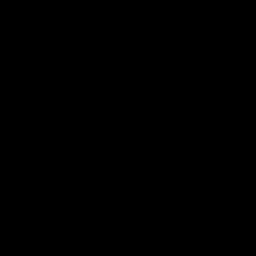

In [38]:
output_array = np.zeros_like(image_array)
output_array

In [39]:
    # Calculate the size of each cell
    i, j = 2, 2
    cell_height = rows // i # // return the integer part of the division result.
    cell_width = cols // j
    print ("i =",i,"j =",j)
    print ("cell_height=", cell_height,"cell_width=",cell_width)

i = 2 j = 2
cell_height= 128 cell_width= 128


In [40]:
    for row in range(i):
        for col in range(j):
            # Determine the boundaries of the cell
            row_start = row * cell_height
            print ("row_start =",row_start)

            row_end = (row + 1) * cell_height if (row + 1) * cell_height <= rows else rows
            print ("row_end =",row_end)

            col_start = col * cell_width
            print ("col_start =",col_start)

            col_end = (col + 1) * cell_width if (col + 1) * cell_width <= cols else cols
            print ("col_end =",col_end)

            # Extract the cell
            cell = image_array[row_start:row_end, col_start:col_end]
            print ("cell =",cell)

            # Check if the cell index is even (using row+col)
            if (row + col) % 2 == 0:
                # Invert colors in the cell
                cell = 255 - cell

            # Place the processed cell back in the output array
            output_array[row_start:row_end, col_start:col_end] = cell

row_start = 0
row_end = 128
col_start = 0
col_end = 128
cell = [[ 47  42  43 ...  51  52  47]
 [ 48  45  44 ...  44  45  41]
 [ 43  44  46 ...  34  39  36]
 ...
 [ 42  43  42 ... 128 117 134]
 [ 40  39  43 ... 125 134 124]
 [ 39  42  41 ... 124 124 118]]
row_start = 0
row_end = 128
col_start = 128
col_end = 256
cell = [[ 42  35  26 ... 133 134 131]
 [ 36  33  26 ... 136 133 136]
 [ 32  32  28 ... 133 128 129]
 ...
 [116 115 109 ...  60  61  67]
 [116 110 102 ...  63  66  67]
 [112 107 101 ...  67  67  70]]
row_start = 128
row_end = 256
col_start = 0
col_end = 128
cell = [[ 36  41  43 ... 114 111 117]
 [ 40  40  42 ... 109 104 108]
 [ 42  40  39 ...  95 105  98]
 ...
 [  5   3   3 ...  40  93 140]
 [  9  11  11 ...  43 108 156]
 [ 18  17  16 ...  59 120 157]]
row_start = 128
row_end = 256
col_start = 128
col_end = 256
cell = [[107 108  98 ...  71  69  70]
 [109  99  93 ...  66  65  66]
 [ 94  97  97 ...  69  66  66]
 ...
 [154 166 173 ...  61  90 102]
 [148 166 168 ...  62  85 102]
 [14

array([[208, 213, 212, ..., 133, 134, 131],
       [207, 210, 211, ..., 136, 133, 136],
       [212, 211, 209, ..., 133, 128, 129],
       ...,
       [  5,   3,   3, ..., 194, 165, 153],
       [  9,  11,  11, ..., 193, 170, 153],
       [ 18,  17,  16, ..., 201, 182, 159]], dtype=uint8)
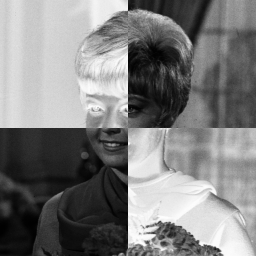

In [41]:
output_array

## Test Function checkBoardImg and Function Save Image

In [42]:
contents = os.listdir(folder_path)
for item in contents:
    print(item)

peppers.ppm
couple.ppm
iglesia.pgm
huesos.pgm
girl.ppm
cabeza.pgm
jelly_beans.ppm
tree.ppm
toys.ppm


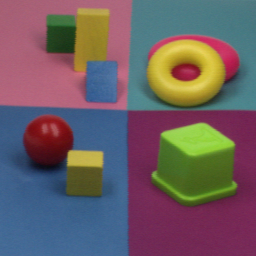

In [43]:
filename1 = "toys.ppm"
path_input = os.path.join(folder_path, filename1)
test_file = Image.open(path_input)
test_file

<PIL.Image.Image image mode=L size=256x256 at 0x789BF09D6020>


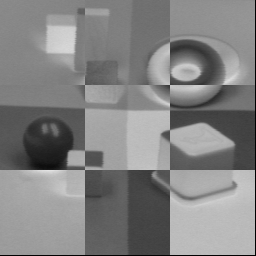

In [44]:
T_tiled = checkBoardImg(test_file, 3, 3)
print(T_tiled)
T_tiled

In [45]:
from PIL import Image
import os

def TiledsaveImage(input_image, file_name, folder_path=None, path_output=None):
    if folder_path is None:
        folder_path = './Lab1/imgs-P1/'
    if path_output is None:
        path_output = './Lab1/imgs-out-P1/'

    # Добавляем расширение .png к имени файла, если оно уже не указано
    if not file_name.lower().endswith('.png'):
        file_name += '.png'

    # Создаем полный путь к выходному файлу, включая имя файла
    full_output_path = os.path.join(path_output, file_name)

    # Создание директории, если она не существует
    os.makedirs(path_output, exist_ok=True)

    # Сохранение изображения
    input_image.save(full_output_path)
    print(f'Файл сохранен как {full_output_path}')



In [46]:
TiledsaveImage(T_tiled, "Tiled")
#TiledsaveImage(T_tiled, 'output_image')

Файл сохранен как ./Lab1/imgs-out-P1/Tiled.png


## Function TiledAndSave Then Plot

### Function TileAndSaveImage

In [47]:
def TileAndSaveImage(input_file, i, j, tlexp, folder_path=None, path_output=None):
    if folder_path is None:
        folder_path = './Lab1/imgs-P1/'
    if path_output is None:
        path_output = './Lab1/imgs-out-P1/'

        # Полный путь к входному файлу
    full_input_path = os.path.join(folder_path, input_file)
    print("full path input", full_input_path)

        # Открытие изображения
    pil_image = Image.open(full_input_path)

    im_pil = checkBoardImg(pil_image,i, j)

       # Подготовка имени файла для сохранения
    base_name = os.path.splitext(input_file)[0]  # Базовое имя файла без расширения
    print("input", base_name)
    output_file = base_name + 'Tile' + tlexp + '.png'  # Добавление 'tested' к имени файла
    print("output", output_file)

    # Полный путь к выходному файлу
    full_output_path = os.path.join(path_output, output_file)
    print("full path output", full_output_path)

    # Создание директории, если она не существует
    os.makedirs(path_output, exist_ok=True)

    # Сохранение изображения
    im_pil.save(full_output_path)
    print(f'Файл сохранен как {full_output_path}')

### Use Function

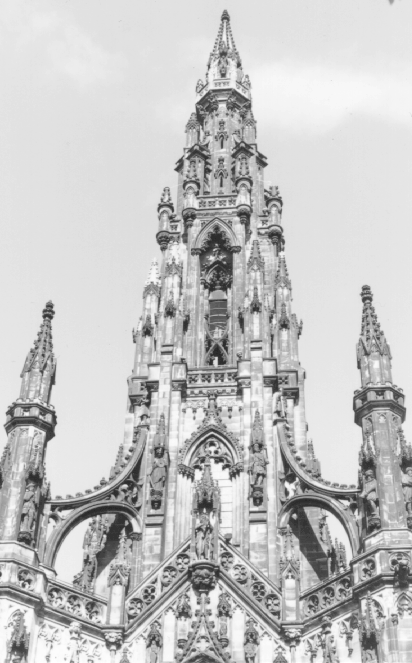

In [48]:
path_input = os.path.join(folder_path, "iglesia.pgm")
pil_image2 = Image.open(path_input)
pil_image2

In [49]:
TileAndSaveImage("iglesia.pgm", 4, 4, "4X4")
TileAndSaveImage("iglesia.pgm", 6, 6, "6X6")
TileAndSaveImage("iglesia.pgm", 5, 6, "5X6")

full path input ./Lab1/imgs-P1/iglesia.pgm
input iglesia
output iglesiaTile4X4.png
full path output ./Lab1/imgs-out-P1/iglesiaTile4X4.png
Файл сохранен как ./Lab1/imgs-out-P1/iglesiaTile4X4.png
full path input ./Lab1/imgs-P1/iglesia.pgm
input iglesia
output iglesiaTile6X6.png
full path output ./Lab1/imgs-out-P1/iglesiaTile6X6.png
Файл сохранен как ./Lab1/imgs-out-P1/iglesiaTile6X6.png
full path input ./Lab1/imgs-P1/iglesia.pgm
input iglesia
output iglesiaTile5X6.png
full path output ./Lab1/imgs-out-P1/iglesiaTile5X6.png
Файл сохранен как ./Lab1/imgs-out-P1/iglesiaTile5X6.png


### Print results

(-0.5, 411.5, 662.5, -0.5)

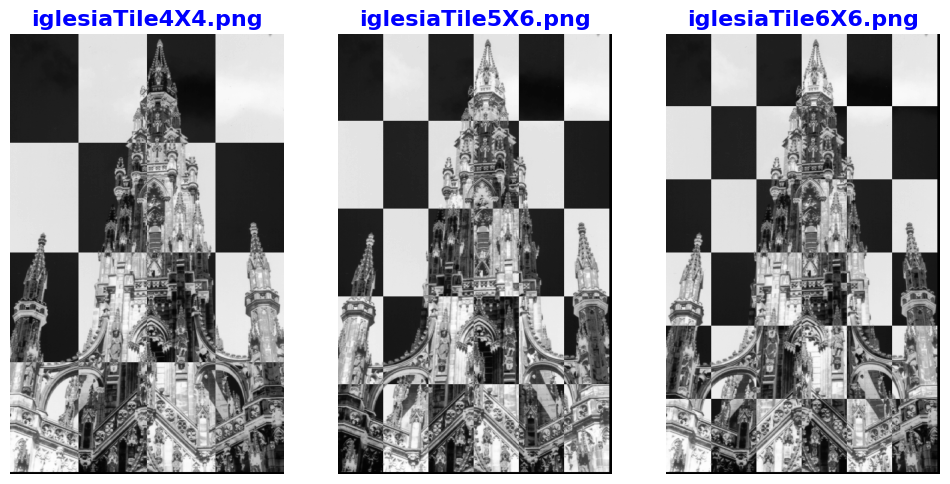

In [50]:
filename1 = "iglesiaTile4X4.png"
path_output_file = os.path.join(path_output, filename1)
PrintTiled1 = Image.open(path_output_file)
filename2 = "iglesiaTile5X6.png"
path_output_file = os.path.join(path_output, filename2)
PrintTiled2 = Image.open(path_output_file)
filename3 = "iglesiaTile6X6.png"
path_output_file = os.path.join(path_output, filename3)
PrintTiled3 = Image.open(path_output_file)


fig, axes = plt.subplots(1, 3, figsize=(12, 10))  # 1 ряд, 3 колонки
axes[0].imshow(PrintTiled1, cmap='gray')
axes[1].imshow(PrintTiled2, cmap='gray')
axes[2].imshow(PrintTiled3, cmap='gray')


axes[0].set_title(filename1, fontsize=16, fontweight='bold', color='blue')
axes[1].set_title(filename2, fontsize=16, fontweight='bold', color='blue')
axes[2].set_title(filename3, fontsize=16, fontweight='bold', color='blue')
#ax.set_title('График 1', fontsize=16, fontweight='bold', color='blue', loc='left', pad=20, y=0.9)

# Удаление осей для каждого из подграфиков
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

In [51]:
"""1. axes.imshow()
Функция imshow() используется для отображения данных в виде изображения, то есть двухмерного массива. Вот основные параметры этой функции:

X : array-like или PIL image
Данные изображения. Может быть любым массивом, который matplotlib может интерпретировать как изображение на двумерной сетке. Может быть также экземпляром изображения PIL.

cmap : str или Colormap, optional
Цветовая карта, используемая если данные передаются как двумерный массив. По умолчанию: None, в этом случае используется цветовая карта по умолчанию.

norm : Normalize, optional
Нормализация используется для масштабирования уровней яркости перед отображением.

aspect : {'equal', 'auto'} или число, optional
Контролирует аспект изображения в axes. По умолчанию 'equal', что сохраняет пропорциональное соотношение координат.

interpolation : str, optional
Алгоритм интерполяции используется при масштабировании изображения. Примеры: 'nearest', 'bilinear', 'bicubic' и т.д.

alpha : scalar, optional
Коэффициент прозрачности изображения, между 0 (полностью прозрачное) и 1 (полностью непрозрачное).

vmin, vmax : scalar, optional
Минимальное и максимальное значения, которые используются для нормализации данных.

origin : {'upper', 'lower'}, optional
Расположение [0,0] угла массива данных, 'upper' (верхний левый угол) или 'lower' (нижний левый угол).

extent : scalars (left, right, bottom, top), optional
Границы изображения по оси x и y.

shape : scalars (нумерация строк, нумерация колонок), optional
Форма массива для интерпретации данных.

filternorm : bool, optional
Применять ли фильтр нормализации.

filterrad : scalar, optional
Радиус фильтра, применяемого в случае интерполяции.

resample : bool, optional
Применять ли повторное выборочное исследование для масштабирования данных.

url : str, optional
URL адрес, связанный с изображением.


2.axes.axis()
Функция axis() используется для получения или установки параметров осей. Вот основные способы использования axis():
'on' / 'off': Включает или отключает оси.
'equal': Включает анисотропное масштабирование осей.
'square': Включает равное масштабирование по обеим осям (делая квадратный вид графика).
'tight': Изменяет пределы осей, чтобы они охватывали точный диапазон данных.
[xmin, xmax, ymin, ymax]: Устанавливает пределы осей.
'auto': Автоматическое масштабирование осей.
'image':Устанавливает пределы так, чтобы данные рассматривались как изображение.
'scaled': Устанавливает равное масштабирование по обеим осям с учетом общей шкалы (также делает квадратный вид, но с сохранением пропорций)."""

"1. axes.imshow()\nФункция imshow() используется для отображения данных в виде изображения, то есть двухмерного массива. Вот основные параметры этой функции:\n\nX : array-like или PIL image\nДанные изображения. Может быть любым массивом, который matplotlib может интерпретировать как изображение на двумерной сетке. Может быть также экземпляром изображения PIL.\n\ncmap : str или Colormap, optional\nЦветовая карта, используемая если данные передаются как двумерный массив. По умолчанию: None, в этом случае используется цветовая карта по умолчанию.\n\nnorm : Normalize, optional\nНормализация используется для масштабирования уровней яркости перед отображением.\n\naspect : {'equal', 'auto'} или число, optional\nКонтролирует аспект изображения в axes. По умолчанию 'equal', что сохраняет пропорциональное соотношение координат.\n\ninterpolation : str, optional\nАлгоритм интерполяции используется при масштабировании изображения. Примеры: 'nearest', 'bilinear', 'bicubic' и т.д.\n\nalpha : scalar, 

# Ex 5 Question function multiHist

## Testing Functions and parametrs

In [52]:
def multiHist(im, n, bins=3):
    """
    Generate histograms for an image at multiple levels of subdivision.

    Args:
    im (numpy.ndarray): The input image as a 2D numpy array.
    n (int): The number of levels to subdivide the image.
    bins (int): The number of bins to use for the histograms.

    Returns:
    List[numpy.ndarray]: A list of histograms for all levels.
    """
    def recursive_subdivide(image, level):
        if level == 0:
            # Calculate histogram for the current sub-image
            hist, _ = np.histogram(image, bins=bins, range=[0, 256])
            histograms.append(hist)
        else:
            rows, cols = image.shape
            mid_row, mid_col = rows // 2, cols // 2

            # Subdivide the image into four quadrants and recurse
            recursive_subdivide(image[:mid_row, :mid_col], level - 1)  # Top-left
            recursive_subdivide(image[:mid_row, mid_col:], level - 1)  # Top-right
            recursive_subdivide(image[mid_row:, :mid_col], level - 1)  # Bottom-left
            recursive_subdivide(image[mid_row:, mid_col:], level - 1)  # Bottom-right

    histograms = []
    recursive_subdivide(im, n - 1)
    return histograms

array([[ 47,  42,  43, ..., 133, 134, 131],
       [ 48,  45,  44, ..., 136, 133, 136],
       [ 43,  44,  46, ..., 133, 128, 129],
       ...,
       [  5,   3,   3, ...,  61,  90, 102],
       [  9,  11,  11, ...,  62,  85, 102],
       [ 18,  17,  16, ...,  54,  73,  96]], dtype=uint8)
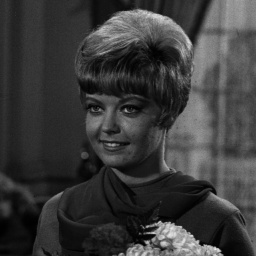

In [53]:
im

array([[232, 232, 233, ..., 229, 229, 229],
       [232, 232, 233, ..., 230, 230, 229],
       [230, 232, 232, ..., 229, 229, 229],
       ...,
       [247, 250, 250, ..., 211, 209, 200],
       [248, 250, 250, ..., 203, 200, 198],
       [243, 248, 252, ..., 217, 211, 206]], dtype=uint8)
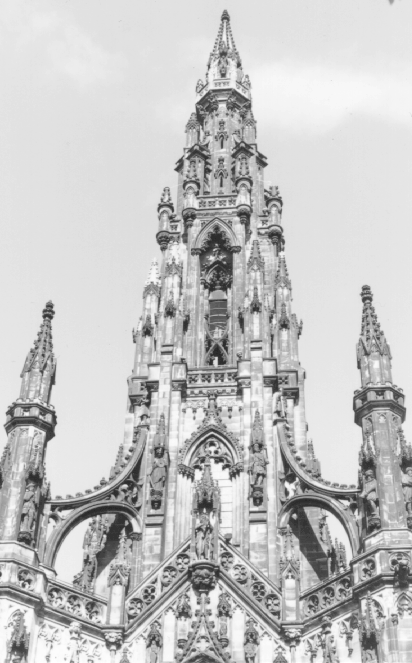

In [54]:
pil_image2_array = np.array(pil_image2)
pil_image2_array

In [55]:
    # Get histograms for 3 levels (1 + 4 + 16 = 21 histograms)
    histograms = multiHist(pil_image2_array, n=2, bins=3)

In [56]:
    # Output the histograms
    for i, hist in enumerate(histograms):
        print(f"Histogram {i+1}: {hist}")


Histogram 1: [  867  3821 63498]
Histogram 2: [ 1958  8333 57895]
Histogram 3: [ 4672 18996 44724]
Histogram 4: [ 5876 21361 41155]


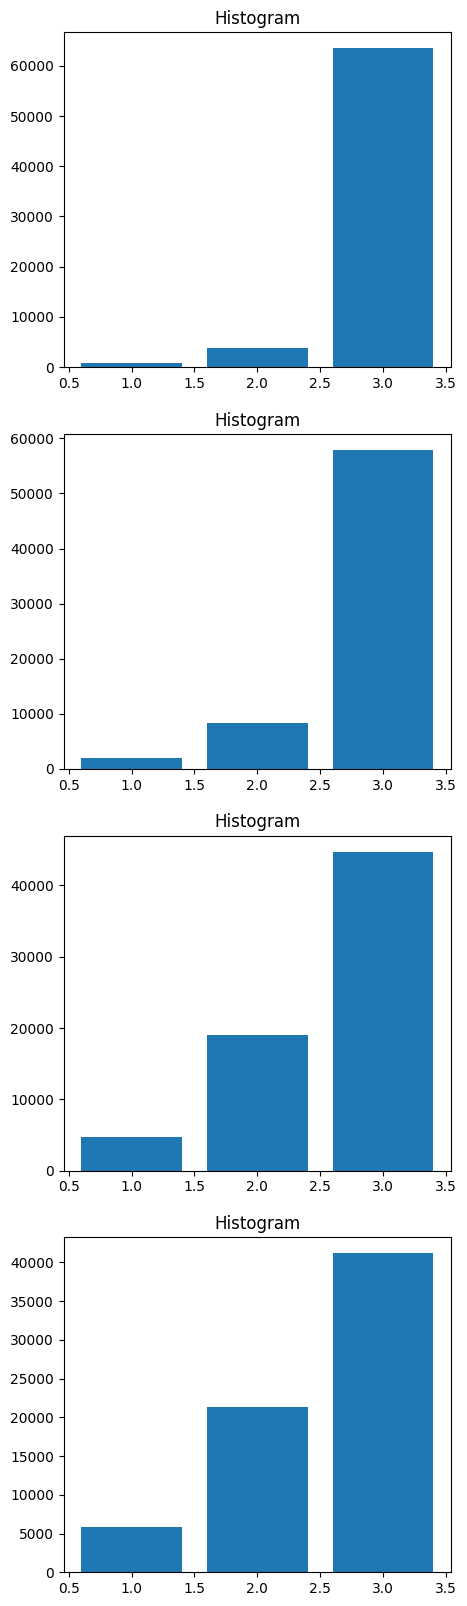

In [57]:
    # Assuming showInGrid is defined to show these histograms visually
    # showInGrid would be a function you define to display histogram data or images
    # For example, to display histograms:
    fig, axes = plt.subplots(len(histograms), 1, figsize=(5, 20))
    for ax, hist in zip(axes, histograms):
        ax.bar(range(1, 4), hist)
        ax.set_title("Histogram")
   # plt.tight_layout()
    plt.show()

## Algoritm for creating list and tests

### Algoritm FOR List and Test

In [58]:
# Сделам так.
#Посдедовательности 1, 4 , 16 это 2 в четной степени 2*i. 2**(2*i) По количеству n создадим списки от
def calculate_list(n):
    result = []
    total = 0
    for i in range(0, n):
      total = 2**(2*i)
      result.append(total)
    return result

# Пример использования
print(calculate_list(1))  # Вывод: [1]
print(calculate_list(2))  # Вывод: [1, 4]
print(calculate_list(3))  # Вывод: [1, 4, 16]

[1]
[1, 4]
[1, 4, 16]


In [59]:
#Воспользуемя функцией разбиения массива как на плитку
#Будем разбивать по элементам списка
#Создавать новый массив или массивы по количеству
#Считать гистограммы массива
#выводить массив изображения и гистограмму

In [60]:
sizes = calculate_list(3)
sizes

[1, 4, 16]

In [61]:
sizes = []
sizes = calculate_list(3)
for i, size in enumerate(sizes):
    globals()[f"size_{i+1}"] = size
print(size_1, size_2, size_3)

1 4 16


### Test Plot image and histograms

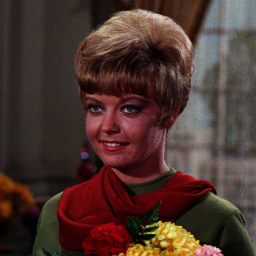

In [62]:
pil_image

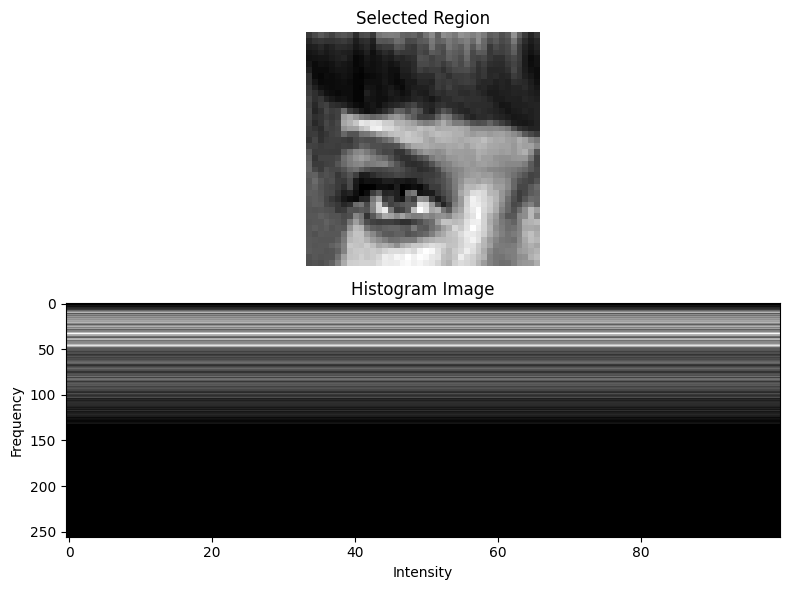

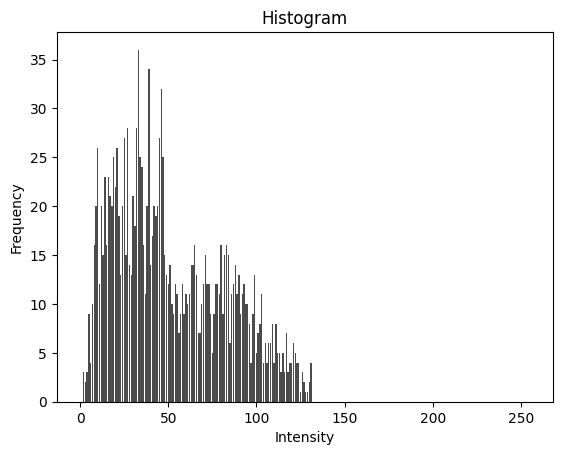

In [63]:
# Создаем случайное изображение для примера
image = im

# Выбираем область изображения для гистограммы
start_row, end_row = 80, 120
start_col, end_col = 80, 120
selected_region = image[start_row:end_row, start_col:end_col]

# Вычисляем гистограмму выбранной области
histogram, _ = np.histogram(selected_region, bins=256, range=(0, 256))

# Создаем массив индексов для гистограммы
x = np.arange(len(histogram))

# Преобразуем гистограмму в форму, пригодную для вывода как изображение
histogram_image = np.repeat(histogram[:, np.newaxis], 100, axis=1)

# Выводим изображение и гистограмму
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].imshow(selected_region, cmap='gray')
axs[0].set_title('Selected Region')
axs[0].axis('off')

axs[1].imshow(histogram_image, aspect='auto', cmap='gray')
axs[1].set_title('Histogram Image')
axs[1].set_xlabel('Intensity')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Выводим столбчатую гистограмму
plt.bar(x, histogram, color='black', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

## Functions to Divide image in parts

### Ver 1

In [83]:
##Версия проще
def divide_imageVer1(image, num_regions):
    # Определяем размеры изображения
    height, width = image.shape

    # Вычисляем размер каждой области
    region_height = height // num_regions
    region_width = width // num_regions

    regions = []

    # Создаем области и добавляем их в список
    for i in range(num_regions):
        for j in range(num_regions):
            start_row = i * region_height
            end_row = start_row + region_height
            start_col = j * region_width
            end_col = start_col + region_width
            regions.append((start_row, end_row, start_col, end_col))

    return regions

### Ver 2

In [84]:
#Версия 2 ближе к С точнее
def divide_imageVer2(image, num_regions):
    regions = []
    rows, cols = image.shape
    n = int(np.sqrt(num_regions))
    for i in range(n):
        for j in range(n):
            start_row = rows // n * i
            end_row = rows // n * (i + 1)
            start_col = cols // n * j
            end_col = cols // n * (j + 1)
            regions.append((start_row, end_row, start_col, end_col))
    return regions

In [85]:
kx = divide_imageVer2(im, 1)
kx

[(0, 256, 0, 256)]

## Function to plot Divide image and histogram

In [76]:
def plot_histograms(image, num_regions):
    for num_region in num_regions:
        if num_region == 0:
            regions = [(0, image.shape[0], 0, image.shape[1])]
        else:
            regions = divide_imageVer1(image, num_region)

        fig, axs = plt.subplots(len(regions), 2, figsize=(10, len(regions) * 4))

        # Обеспечиваем, что axs всегда будет двумерным массивом
        axs = axs.reshape(-1, 2) if len(regions) > 1 else np.array([axs])

        for i, (start_row, end_row, start_col, end_col) in enumerate(regions):
            selected_region = image[start_row:end_row, start_col:end_col]
            histogram, bins = np.histogram(selected_region, bins=256, range=(0, 256))
            x = np.arange(len(histogram))

            axs[i, 0].imshow(selected_region, cmap='gray')
            axs[i, 0].set_title(f'Selected Region {i+1}')
            axs[i, 0].axis('off')

            axs[i, 1].bar(x, histogram, color='black', alpha=0.7)
            axs[i, 1].set_title(f'Histogram {i+1}')
            axs[i, 1].axis('off')

        plt.tight_layout()
        plt.show()


## Test and tune code for Divide function in flow

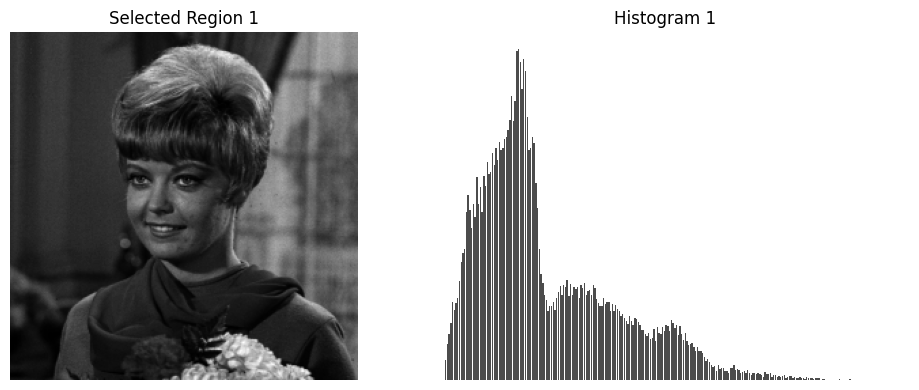

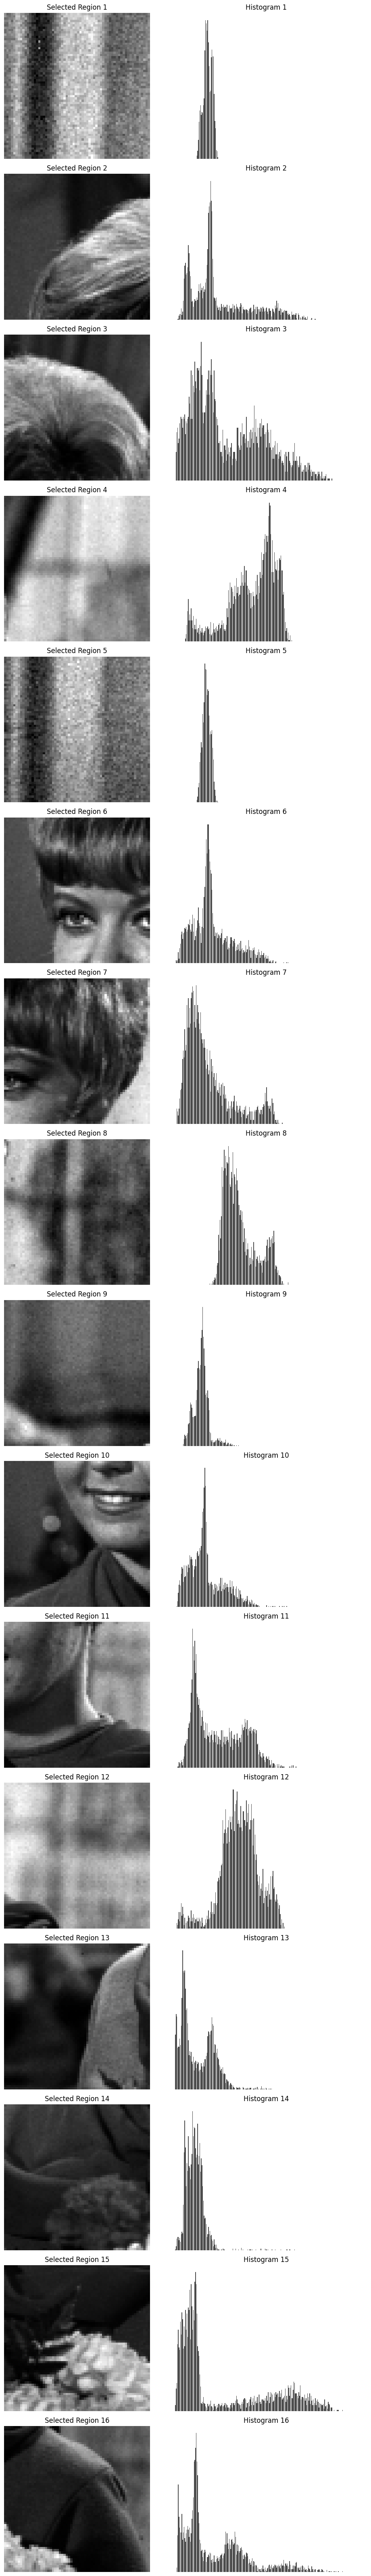

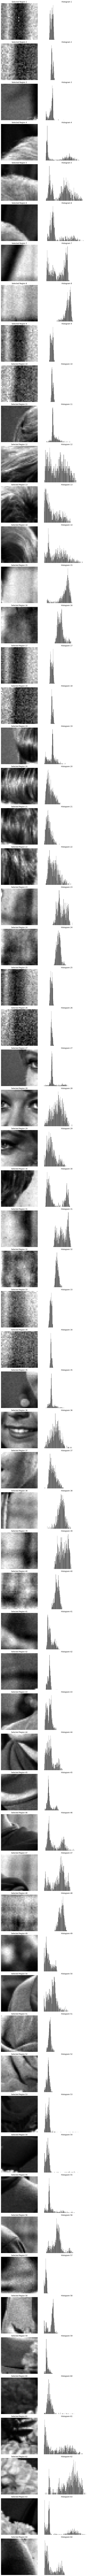

In [68]:
num_regions = [1, 4, 8]
image = im
for num_region in num_regions:
    if num_region == 0:
        regions = [(0, image.shape[0], 0, image.shape[1])]
    else:
        regions = divide_imageVer1(image, num_region)

    fig, axs = plt.subplots(len(regions), 2, figsize=(10, len(regions) * 4))

    # Обеспечиваем, что axs всегда будет двумерным массивом
    axs = axs.reshape(-1, 2) if len(regions) > 1 else np.array([axs])

    for i, (start_row, end_row, start_col, end_col) in enumerate(regions):
        selected_region = image[start_row:end_row, start_col:end_col]
        histogram, bins = np.histogram(selected_region, bins=256, range=(0, 256))
        x = np.arange(len(histogram))

        axs[i, 0].imshow(selected_region, cmap='gray')
        axs[i, 0].set_title(f'Selected Region {i+1}')
        axs[i, 0].axis('off')

        axs[i, 1].bar(x, histogram, color='black', alpha=0.7)
        axs[i, 1].set_title(f'Histogram {i+1}')
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

## Final use Function

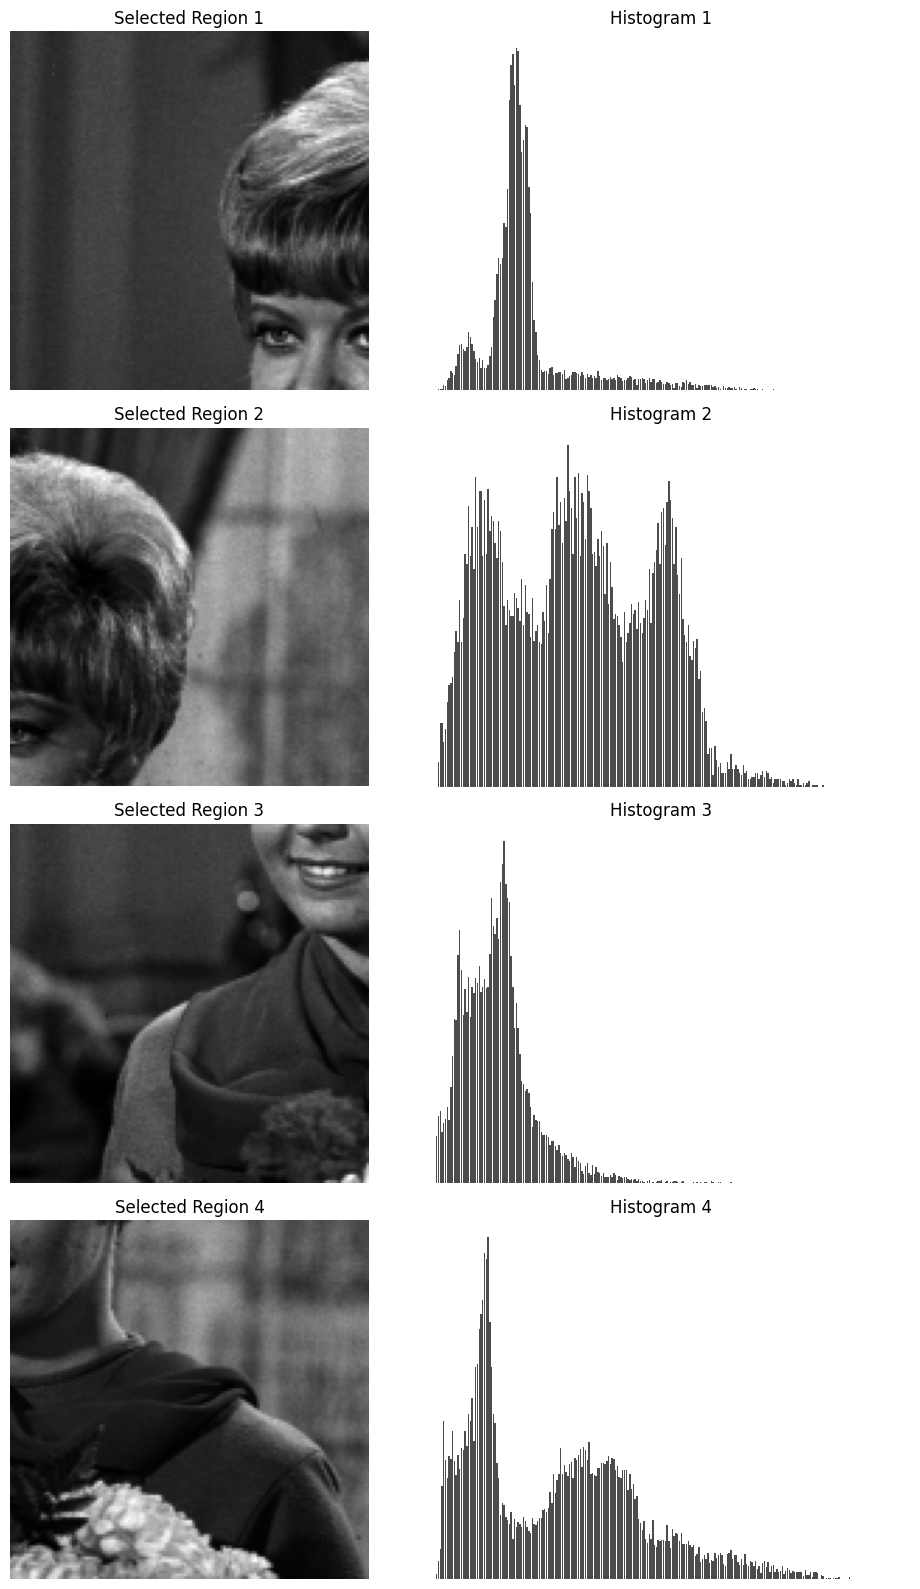

In [82]:
k = calculate_list(2)
plot_histograms(im, k)

# Other code

In [69]:
sizes

[1, 4, 16]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

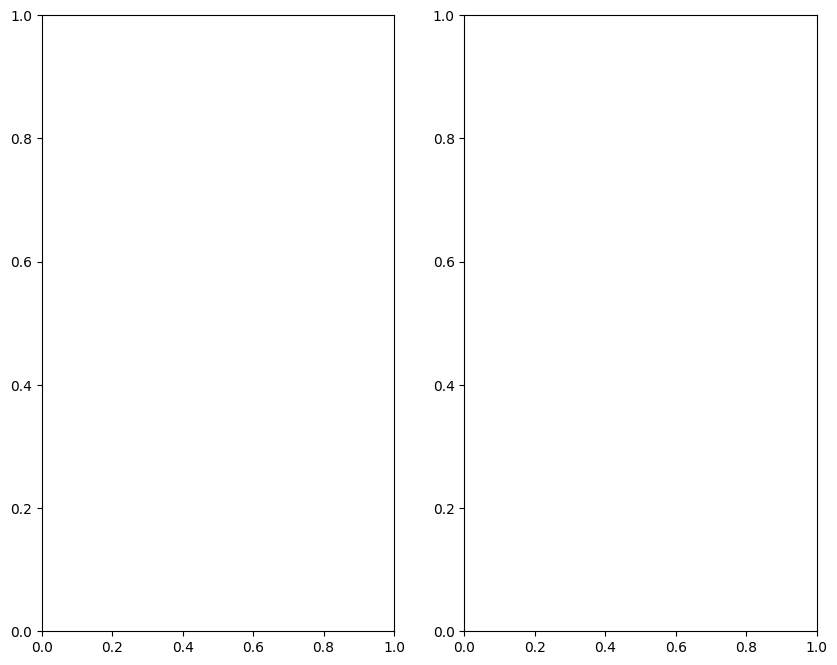

In [70]:
num_regions = [1, 2, 4]  # список с количеством регионов
plot_histograms(im, num_regions)

In [ ]:
regions = 2
num_regions = divide_image(im, regions)
num_regions

In [ ]:
path_output = './Lab1/imgs-out-P1/'

from functools import wraps

def print_arg_names(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        arg_names = func.__code__.co_varnames[:func.__code__.co_argcount]
        print("Function arguments:")
        for name, value in zip(arg_names, args):
            print(f"{name} = {value}")
        for name, value in kwargs.items():
            print(f"{name} = {value}")
        return func(*args, **kwargs)
    return wrapper

print_arg_names(T_tiled)

text = str(T_tiled)


#text = next(name for name in T_tiled if T_tiled[name] is value)


#filename = f"{T_tiled}_Tile.png"
#characters = [ord(char) for char in T_tiled]
#filename = characters

print("filename", text)

# Полный путь к выходному файлу

output_file = filename  # Добавление 'tested' к имени файла
print("output_file", output_file)

full_output_path = os.path.join(path_output)
print("full path output", full_output_path)

    # Создание директории, если она не существует
    #os.makedirs(path_output, exist_ok=True)

    # Сохранение изображения
    #filename.save(full_output_path)
    #print(f'Файл сохранен как {full_output_path}')